<a href="https://colab.research.google.com/github/Yogith66/Aiimg/blob/main/FootballFantasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY (WITH CODING)**   

###  1] Soumik Chowdhury
###  2] Vansh Surana
###  3] Ujwal KS
###  4] Yogith N


   
   

### **Problem Statement:-** Develop a comprehensive data-driven strategy for optimizing team performance in Fantasy Premier League (FPL) and make informed decisions on player selection, transfers, and budget allocation. This involves analyzing player statistics, ownership percentages, real-world performance metrics, and market values. The strategy should be iterative, adapting to changing FPL trends and player performances throughout the season. The goal is to achieve success in the FPL game by combining statistical insights with strategic decision-making.

# **TOPIC - FOOTBALL DATA DILEMMA (BILLION-POUND STRATEGY FOR SUCCESS..!)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# **1. Data Exploration**

In [ ]:
fpl_data = pd.read_csv('/content/FPL_Data.csv')
print('/content/players.csv')

/content/players.csv


In [ ]:
transfermarkt_data = pd.read_csv('transfermarket_market_value.csv')

In [ ]:
print("FPL Data:")
print(fpl_data.head())

FPL Data:
  season_x                name position  team_x  assists  bonus  bps  \
0  2016-17     Aaron Cresswell      DEF     NaN        0      0    0   
1  2016-17        Aaron Lennon      MID     NaN        0      0    6   
2  2016-17        Aaron Ramsey      MID     NaN        0      0    5   
3  2016-17  Abdoulaye Doucouré      MID     NaN        0      0    0   
4  2016-17        Adam Forshaw      MID     NaN        0      0    3   

   clean_sheets  creativity  element  ...  team_h_score  threat  total_points  \
0             0         0.0      454  ...           2.0     0.0           0.0   
1             0         0.3      142  ...           1.0     0.0           1.0   
2             0         4.9       16  ...           3.0    23.0           2.0   
3             0         0.0      482  ...           1.0     0.0           0.0   
4             0         1.3      286  ...           1.0     0.0           1.0   

   transfers_balance  transfers_in transfers_out  value  was_home  \
0

In [ ]:
print(fpl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           13428 non-null  object 
 1   name               13428 non-null  object 
 2   position           13428 non-null  object 
 3   team_x             0 non-null      float64
 4   assists            13428 non-null  int64  
 5   bonus              13428 non-null  int64  
 6   bps                13428 non-null  int64  
 7   clean_sheets       13428 non-null  int64  
 8   creativity         13428 non-null  float64
 9   element            13428 non-null  int64  
 10  fixture            13428 non-null  int64  
 11  goals_conceded     13428 non-null  int64  
 12  goals_scored       13428 non-null  int64  
 13  ict_index          13428 non-null  float64
 14  influence          13428 non-null  float64
 15  kickoff_time       13428 non-null  object 
 16  minutes            134

In [ ]:
print(fpl_data.describe())

       team_x       assists         bonus           bps  clean_sheets  \
count     0.0  13428.000000  13428.000000  13428.000000  13428.000000   
mean      NaN      0.061662      0.162720      8.854632      0.154007   
std       NaN      0.262747      0.594246     11.369480      0.360968   
min       NaN      0.000000      0.000000    -18.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      4.000000      0.000000   
75%       NaN      0.000000      0.000000     15.000000      0.000000   
max       NaN      3.000000      3.000000    114.000000      1.000000   

         creativity       element       fixture  goals_conceded  goals_scored  \
count  13428.000000  13428.000000  13428.000000    13428.000000  13428.000000   
mean       7.071269    286.010724    178.640453        0.653932      0.068439   
std       13.003428    175.747879     97.915465        1.059587      0.286238   
min        0.00000

In [ ]:
print("\nTransfermarkt Data:")
print(transfermarkt_data.head(10))


Transfermarkt Data:
               Player            Position  Market Value
0      Erling Haaland      Centre-Forward           180
1         Bukayo Saka        Right Winger           120
2         Declan Rice  Defensive Midfield           110
3               Rodri  Defensive Midfield           110
4          Phil Foden        Right Winger           110
5      Moisés Caicedo  Defensive Midfield            90
6      Julián Álvarez      Second Striker            90
7     Martin Ødegaard  Attacking Midfield            90
8     Bruno Guimarães  Defensive Midfield            85
9  Gabriel Martinelli         Left Winger            85


In [ ]:
print(transfermarkt_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        100 non-null    object
 1   Position      100 non-null    object
 2   Market Value  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None


       Market Value
count    100.000000
mean      56.880000
std       22.831522
min       35.000000
25%       40.000000
50%       50.000000
75%       66.250000
max      180.000000
       Market_Value
count    100.000000
mean      56.880000
std       22.831522
min       35.000000
25%       40.000000
50%       50.000000
75%       66.250000
max      180.000000


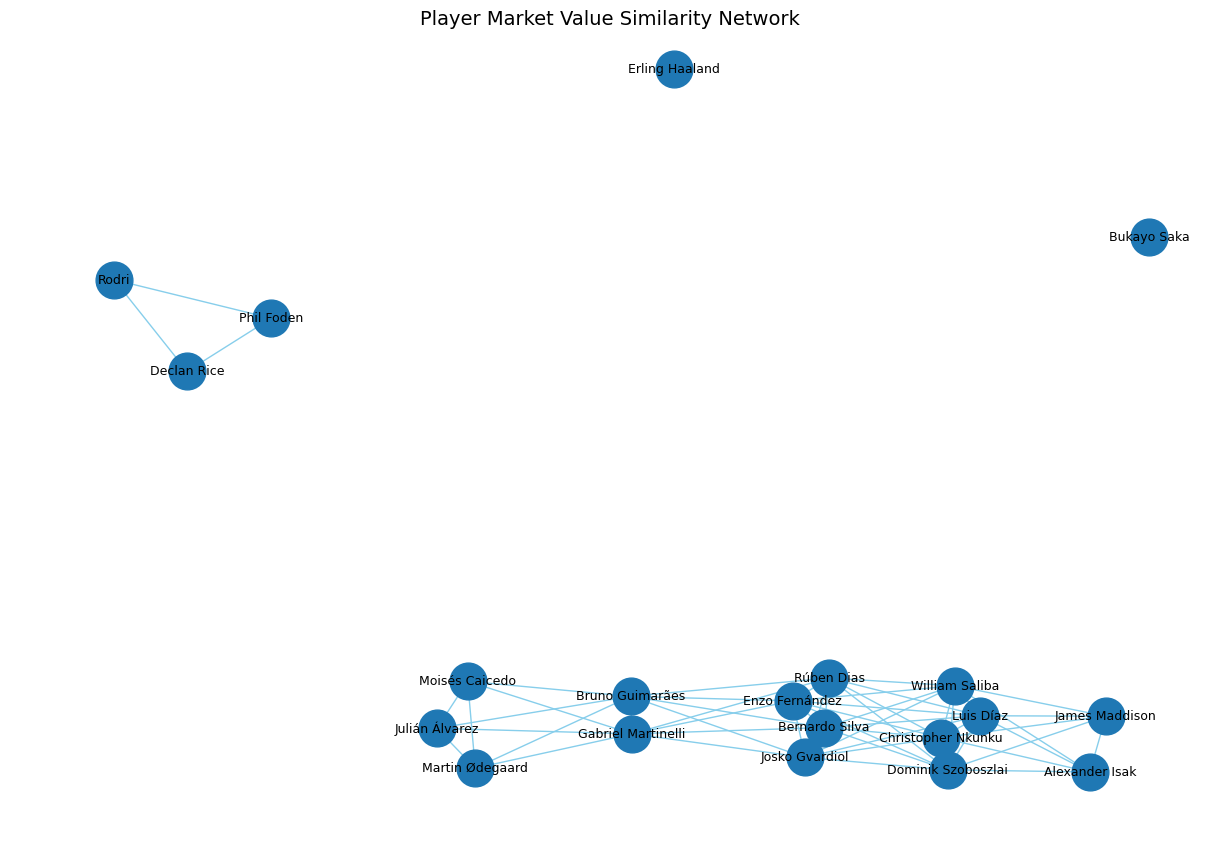

In [ ]:
print(transfermarkt_data.describe())
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Fix column names to avoid space issues
transfermarkt_data.columns = transfermarkt_data.columns.str.replace(' ', '_')

# 1. Describe the data
print(transfermarkt_data.describe())

# 2. Filter top N players
top_players = transfermarkt_data.sort_values(by='Market_Value', ascending=False).head(20)

# 3. Build the graph
G = nx.Graph()

# Add nodes
for _, row in top_players.iterrows():
    G.add_node(row['Player'], value=row['Market_Value'])

# Add edges if market value difference <= 5
for p1, p2 in combinations(top_players.itertuples(index=False), 2):
    if abs(p1.Market_Value - p2.Market_Value) <= 5:
        G.add_edge(p1.Player, p2.Player)

# 4. Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=700, font_size=9, edge_color='skyblue')
plt.title("Player Market Value Similarity Network", fontsize=14)
plt.show()


In [ ]:
print(fpl_data.columns)

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [ ]:
understat_data = pd.read_csv('understat.csv')

In [ ]:
print(understat_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4088 non-null   int64  
 1   minute           4088 non-null   int64  
 2   result           4088 non-null   object 
 3   X                4088 non-null   float64
 4   Y                4088 non-null   float64
 5   xG               4088 non-null   float64
 6   player           4088 non-null   object 
 7   h_a              4088 non-null   object 
 8   player_id        4088 non-null   int64  
 9   situation        4088 non-null   object 
 10  season           4088 non-null   int64  
 11  shotType         4088 non-null   object 
 12  match_id         4088 non-null   int64  
 13  h_team           4088 non-null   object 
 14  a_team           4088 non-null   object 
 15  h_goals          4088 non-null   int64  
 16  a_goals          4088 non-null   int64  
 17  date          

In [ ]:
print(understat_data.describe())

                  id       minute            X            Y           xG  \
count    4088.000000  4088.000000  4088.000000  4088.000000  4088.000000   
mean   436884.979452    48.416830     0.850205     0.504296     0.110573   
std      6919.838832    26.449992     0.086446     0.123129     0.161434   
min    425563.000000     0.000000     0.017000     0.034000     0.000000   
25%    430583.750000    26.000000     0.793000     0.421000     0.026222   
50%    436659.500000    49.000000     0.865000     0.501000     0.052914   
75%    442778.250000    71.000000     0.910000     0.588000     0.096253   
max    448524.000000    99.000000     0.995000     0.978000     0.973964   

          player_id  season      match_id      h_goals      a_goals  
count   4088.000000  4088.0   4088.000000  4088.000000  4088.000000  
mean    4090.615949  2021.0  16453.624755     1.555773     1.285959  
std     3201.239893     0.0     45.946460     1.331635     1.200961  
min       62.000000  2021.0  16376.

In [ ]:
print("\nMissing Values:")
print(understat_data.isnull().sum())


Missing Values:
id                    0
minute                0
result                0
X                     0
Y                     0
xG                    0
player                0
h_a                   0
player_id             0
situation             0
season                0
shotType              0
match_id              0
h_team                0
a_team                0
h_goals               0
a_goals               0
date                  0
player_assisted    1091
lastAction          479
dtype: int64


In [ ]:
top_scorers = understat_data.groupby('player')['h_goals'].sum().sort_values(ascending=False).head(10)
print("\nTop Scorers:")
print(top_scorers)



Top Scorers:
player
Mohamed Salah          99
Cristiano Ronaldo      83
Diogo Jota             75
Jamie Vardy            73
Michail Antonio        72
Bruno Fernandes        72
Allan Saint-Maximin    71
Conor Gallagher        69
Sadio Mané             69
Raphinha               67
Name: h_goals, dtype: int64


In [ ]:
top_scorers = understat_data.groupby('player')['a_goals'].sum().sort_values(ascending=False).head(10)
print("\nTop Scorers:")
print(top_scorers)


Top Scorers:
player
Mohamed Salah        132
Sadio Mané            97
Cristiano Ronaldo     78
Michail Antonio       71
Jarrod Bowen          70
Joshua King           59
Said Benrahma         55
Raphinha              55
Jamie Vardy           55
Ismaila Sarr          54
Name: a_goals, dtype: int64


# **1. Exploring Basic FPL Data**


📊 Generating cluster plot for: Goalkeeper


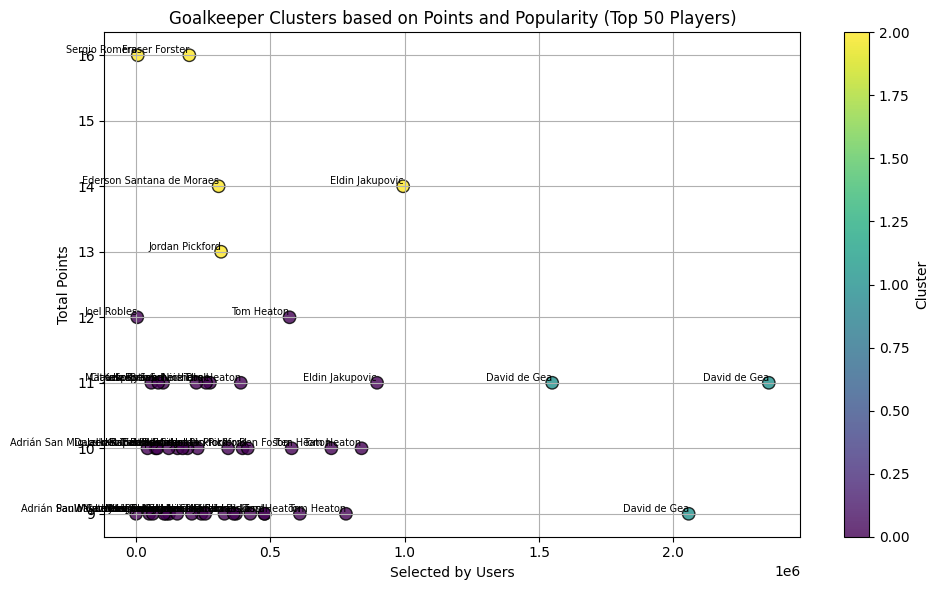


📊 Generating cluster plot for: Defender


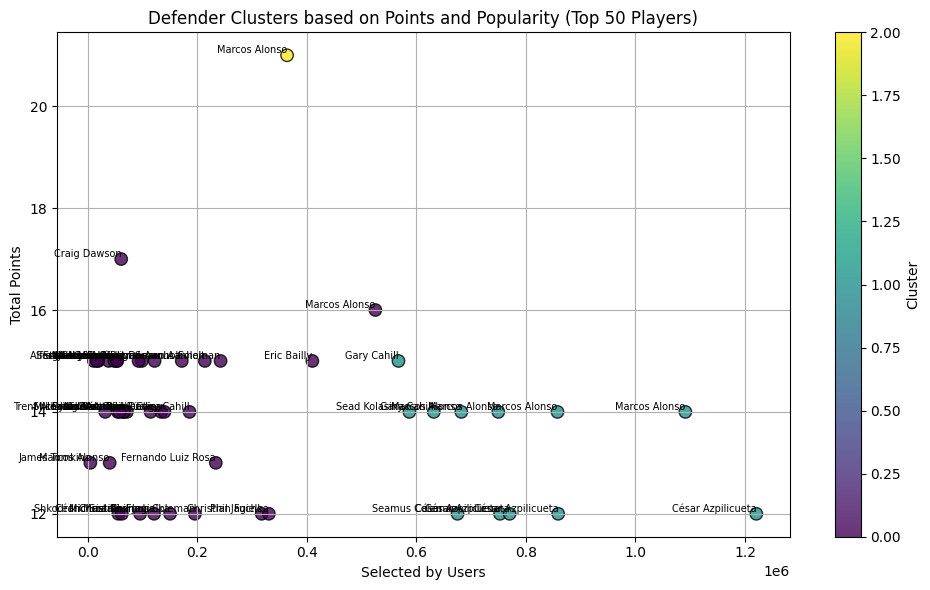


📊 Generating cluster plot for: Midfielder


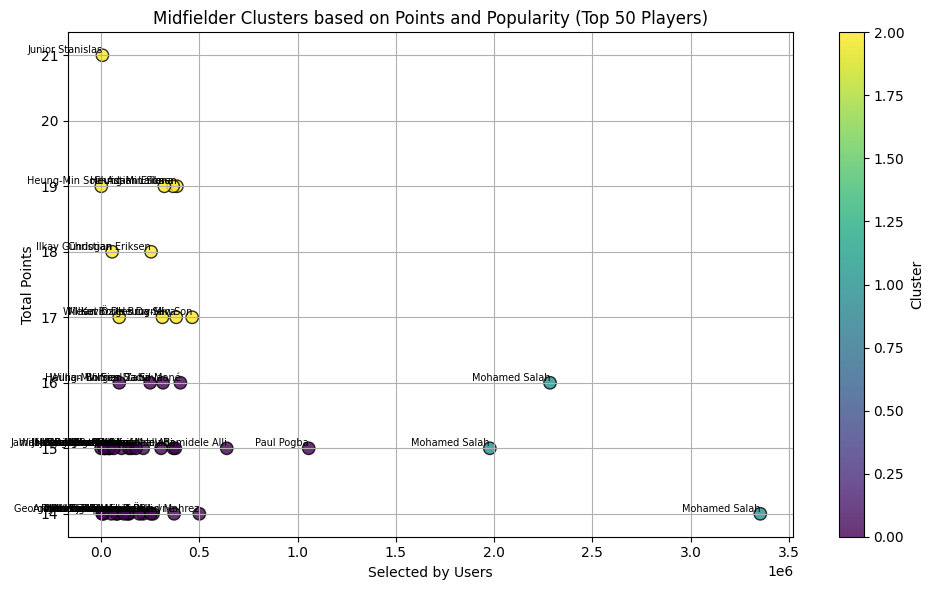


📊 Generating cluster plot for: Forward


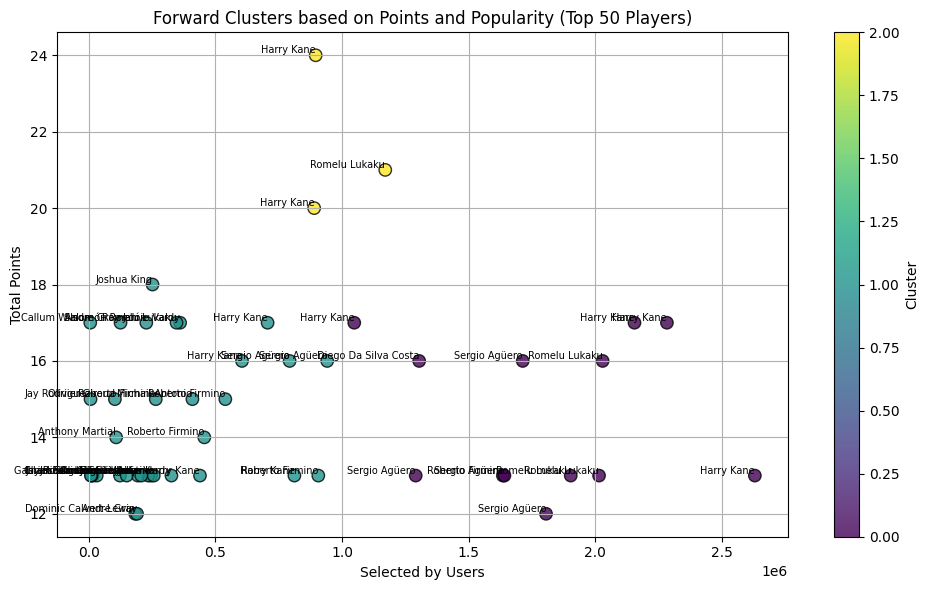


🌟 DREAM SQUAD 🌟
               name    position  total_points  value
0   Willy Caballero  Goalkeeper           7.0    4.7
1       Eric Bailly    Defender          15.0    6.0
2     Cédric Soares    Defender          12.0    4.8
3    Seamus Coleman    Defender          15.0    5.5
4     Heung-Min Son  Midfielder          19.0    7.4
5      Riyad Mahrez  Midfielder          14.0    8.5
6     Bamidele Alli  Midfielder          15.0    8.1
7   Michy Batshuayi     Forward          12.0    8.4
8       Troy Deeney     Forward          11.0    6.9
9     Ashley Barnes     Forward          11.0    4.4
10     Odion Ighalo     Forward          11.0    7.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize value if needed
if fpl_data['value'].max() > 100:
    fpl_data['value'] = fpl_data['value'] / 10

# Standardize positions if needed
fpl_data['position'] = fpl_data['position'].replace({
    'DEF': 'Defender',
    'MID': 'Midfielder',
    'FWD': 'Forward',
    'GK': 'Goalkeeper',
    'GKP': 'Goalkeeper'
})

# Define positions
positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

for pos in positions:
    print(f"\n📊 Generating cluster plot for: {pos}")

    # Filter players of that position
    pos_data = fpl_data[fpl_data['position'] == pos].copy()

    # ➡️ Keep only top 50 players based on total_points
    pos_data = pos_data.sort_values(by='total_points', ascending=False).head(50)

    # Prepare data for clustering
    clustering_data = pos_data[['total_points', 'selected']].dropna()

    # Scale data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Apply KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Assign clusters
    pos_data.loc[clustering_data.index, 'cluster'] = clusters

    # Plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        pos_data.loc[clustering_data.index, 'selected'],
        pos_data.loc[clustering_data.index, 'total_points'],
        c=clusters,
        cmap='viridis',
        s=80,
        alpha=0.8,
        edgecolors='k'
    )

    # OPTIONAL: Add player names on plot
    for i, row in pos_data.loc[clustering_data.index].iterrows():
        plt.text(
            row['selected'],
            row['total_points'],
            row['name'],
            fontsize=7,
            ha='right',
            va='bottom'
        )

    # Plot aesthetics
    plt.title(f'{pos} Clusters based on Points and Popularity (Top 50 Players)')
    plt.xlabel('Selected by Users')
    plt.ylabel('Total Points')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------- FINAL BUDGET + POINTS BASED FORMATION SQUAD ----------------
import numpy as np
import pandas as pd

# Step 0: Remove duplicate players by name (keep highest scoring one)
fpl_data = fpl_data.sort_values(by='total_points', ascending=False)
fpl_data = fpl_data.drop_duplicates(subset='name', keep='first')

# Step 1: Preprocessing
if fpl_data['value'].max() > 100:
    fpl_data['value'] = fpl_data['value'] / 10

fpl_data['position'] = fpl_data['position'].replace({
    'DEF': 'Defender',
    'MID': 'Midfielder',
    'FWD': 'Forward',
    'GK': 'Goalkeeper',
    'GKP': 'Goalkeeper'
})

# Step 2: Formation Setup
position_requirements = {
    'Goalkeeper': 1,
    'Defender': 3,
    'Midfielder': 3,
    'Forward': 4
}

# Step 3: Random Dream Squad Creation (formation respected)
dream_squad = pd.DataFrame()
already_selected = set()

for position, count in position_requirements.items():
    pos_players = fpl_data[fpl_data['position'] == position].copy()
    pos_players = pos_players[~pos_players['name'].isin(already_selected)]
    pos_players = pos_players.sort_values(by='total_points', ascending=False).head(30)

    picked = pos_players.sample(n=count, replace=False, random_state=None)
    already_selected.update(picked['name'].tolist())
    dream_squad = pd.concat([dream_squad, picked])

# Step 4: Final Output
dream_squad = dream_squad.reset_index(drop=True)
total_cost = dream_squad['value'].sum()

print("\n🌟 DREAM SQUAD 🌟")
print(dream_squad[['name', 'position', 'total_points', 'value']])

# ---------------- END OF FINAL CODE ----------------


Name: Player's Name

Total Points: Total Fantasy Primier League Points Earned

Selected: Number of FPL managers who have selected the player

GW: GameWeek

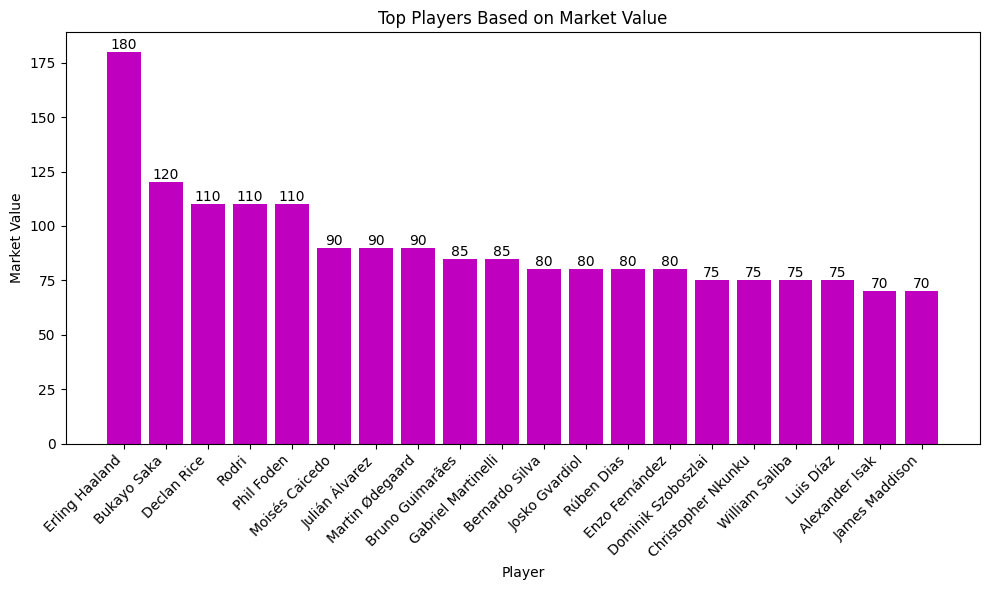

In [ ]:
plt.figure(figsize=(10, 6))

bars = plt.bar(top_players['Player'], top_players['Market_Value'], color='m')

plt.xlabel('Player')
plt.ylabel('Market Value')
plt.title('Top Players Based on Market Value')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# **2. Identify Popular Players**

In [ ]:
sample_data = fpl_data.sample(frac=0.1)  # Adjust the fraction as needed
selected_metrics = ['name', 'total_points', 'selected', 'GW']
selected_data = sample_data[selected_metrics]

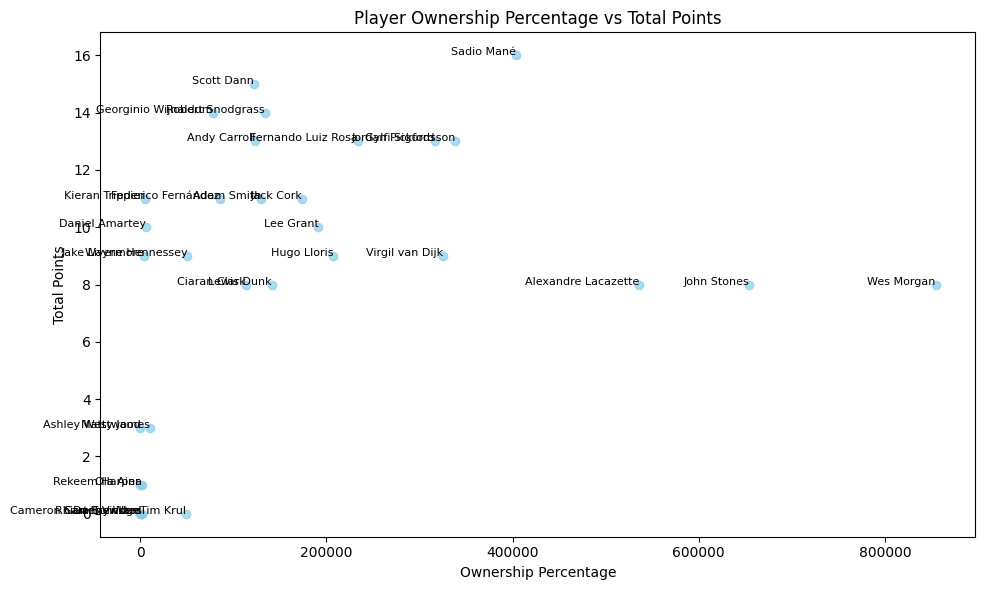

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['selected'], selected_data['total_points'], color='skyblue', alpha=0.7)
plt.xlabel('Ownership Percentage')
plt.ylabel('Total Points')
plt.title('Player Ownership Percentage vs Total Points')

for i, txt in enumerate(selected_data['name']):
    plt.annotate(txt, (selected_data['selected'].iloc[i], selected_data['total_points'].iloc[i]), fontsize=8, ha='right')

plt.tight_layout()

plt.show()

In [ ]:
# Consider whether the popularity of a player in FPL aligns with their performance on the pitch.

sample_data = fpl_data.sample(frac=0.1)  # Adjust the fraction as needed
selected_metrics = ['name', 'total_points', 'selected', 'position', 'GW']
selected_data = sample_data[selected_metrics]

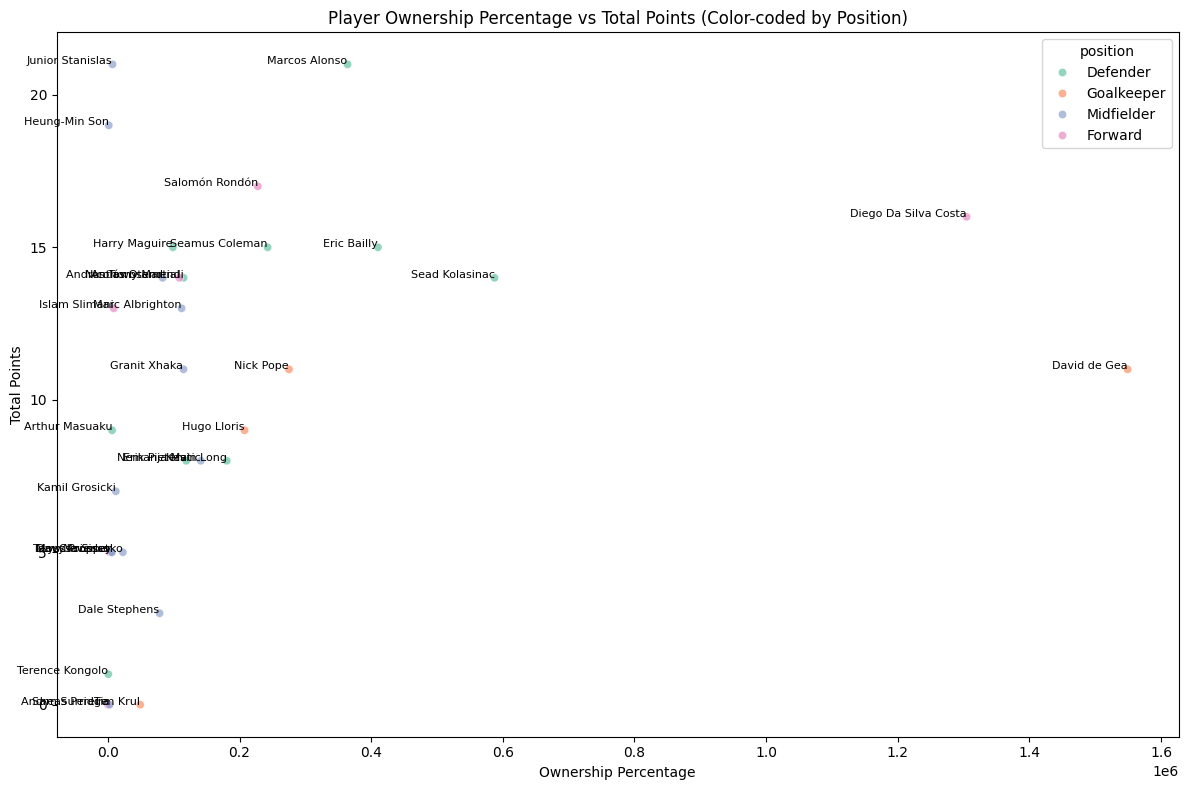

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='selected', y='total_points', hue='position', data=selected_data, palette='Set2', alpha=0.7)
plt.xlabel('Ownership Percentage')
plt.ylabel('Total Points')
plt.title('Player Ownership Percentage vs Total Points (Color-coded by Position)')

for i, txt in enumerate(selected_data['name']):
    plt.annotate(txt, (selected_data['selected'].iloc[i], selected_data['total_points'].iloc[i]), fontsize=8, ha='right')

plt.tight_layout()
plt.show()

# **3. Assess Player Form**

In [ ]:
# - Evaluate FPL points earned by players in recent matches to gauge their current form.

selected_metrics = ['name', 'total_points', 'position', 'GW']
selected_data = fpl_data[selected_metrics]

In [ ]:
top_positions = ['FWD', 'MID']
filtered_data = selected_data[selected_data['position'].isin(top_positions)]
recent_gameweeks = 5
recent_data = filtered_data[filtered_data['GW'] > filtered_data['GW'].max() - recent_gameweeks]

<ipython-input-25-683c4e7aff7a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='position', y='total_points', data=recent_data, ci=None, palette='viridis')


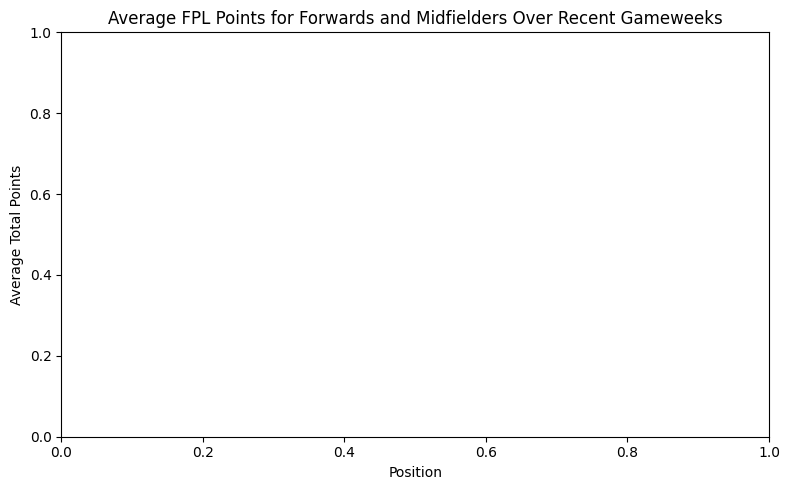

In [ ]:
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='position', y='total_points', data=recent_data, ci=None, palette='viridis')
plt.xlabel('Position')
plt.ylabel('Average Total Points')
plt.title('Average FPL Points for Forwards and Midfielders Over Recent Gameweeks')

for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.tight_layout()
plt.show()

In [ ]:
selected_metrics = ['name', 'total_points', 'position', 'GW']
selected_data = fpl_data[selected_metrics]
recent_gameweeks = 5
recent_data = selected_data[selected_data['GW'] > selected_data['GW'].max() - recent_gameweeks]

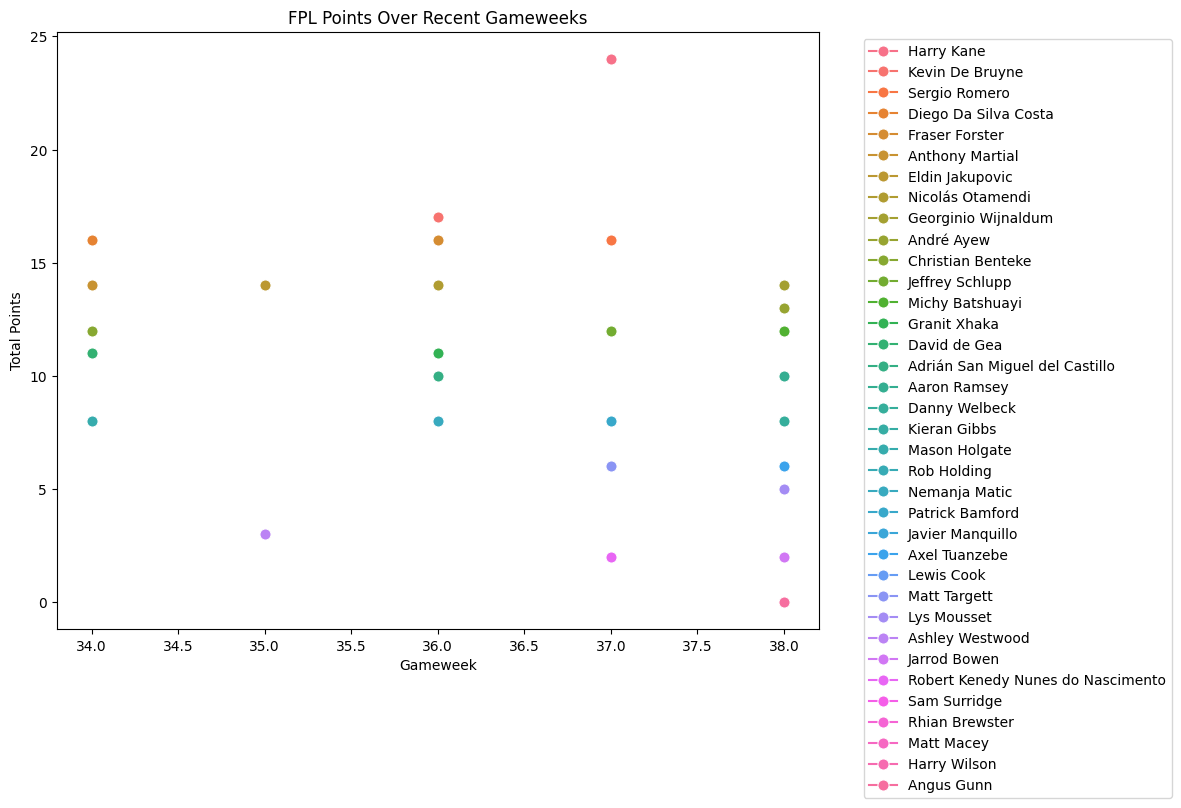

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='GW', y='total_points', hue='name', data=recent_data, marker='o', markersize=8)
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.title('FPL Points Over Recent Gameweeks')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

In [ ]:
#  Identify players who have been consistently performing well in the fantasy game.

selected_metrics = ['name', 'total_points', 'position', 'GW']
selected_data = fpl_data[selected_metrics]
average_points = selected_data.groupby('name')['total_points'].mean().reset_index()
top_players = average_points.sort_values(by='total_points', ascending=False)
top_n_players = 10
filtered_players = top_players.head(top_n_players)

<ipython-input-29-1d1c7911ba65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='total_points', data=filtered_players, palette='viridis')


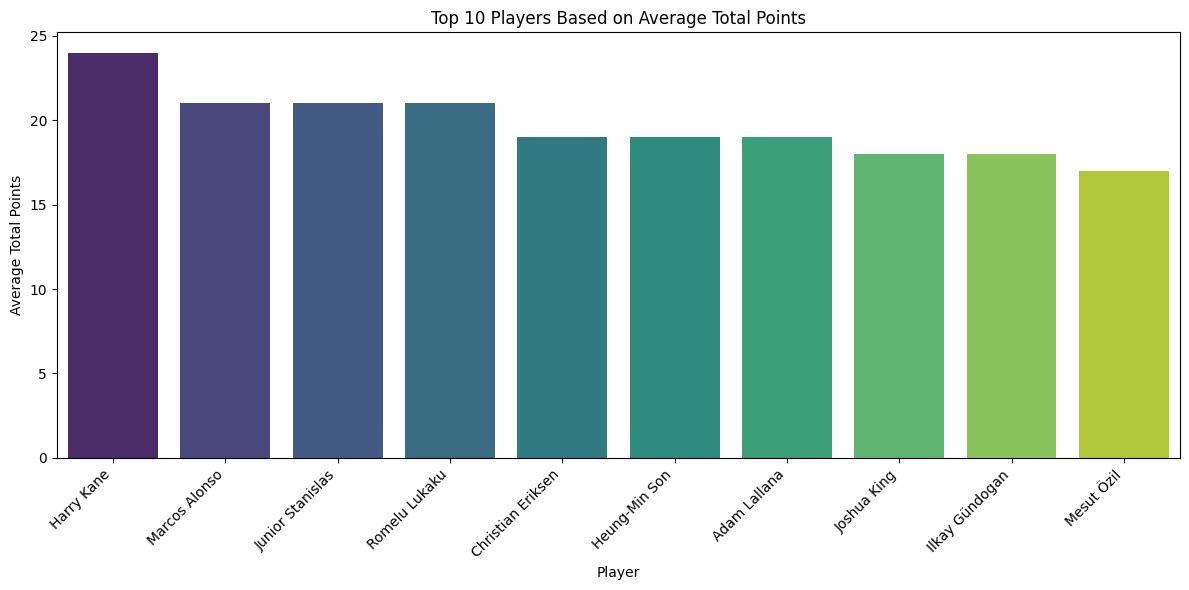

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='total_points', data=filtered_players, palette='viridis')
plt.xlabel('Player')
plt.ylabel('Average Total Points')
plt.title(f'Top {top_n_players} Players Based on Average Total Points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **4. Correlate FPL Performance with Real-World Performance**


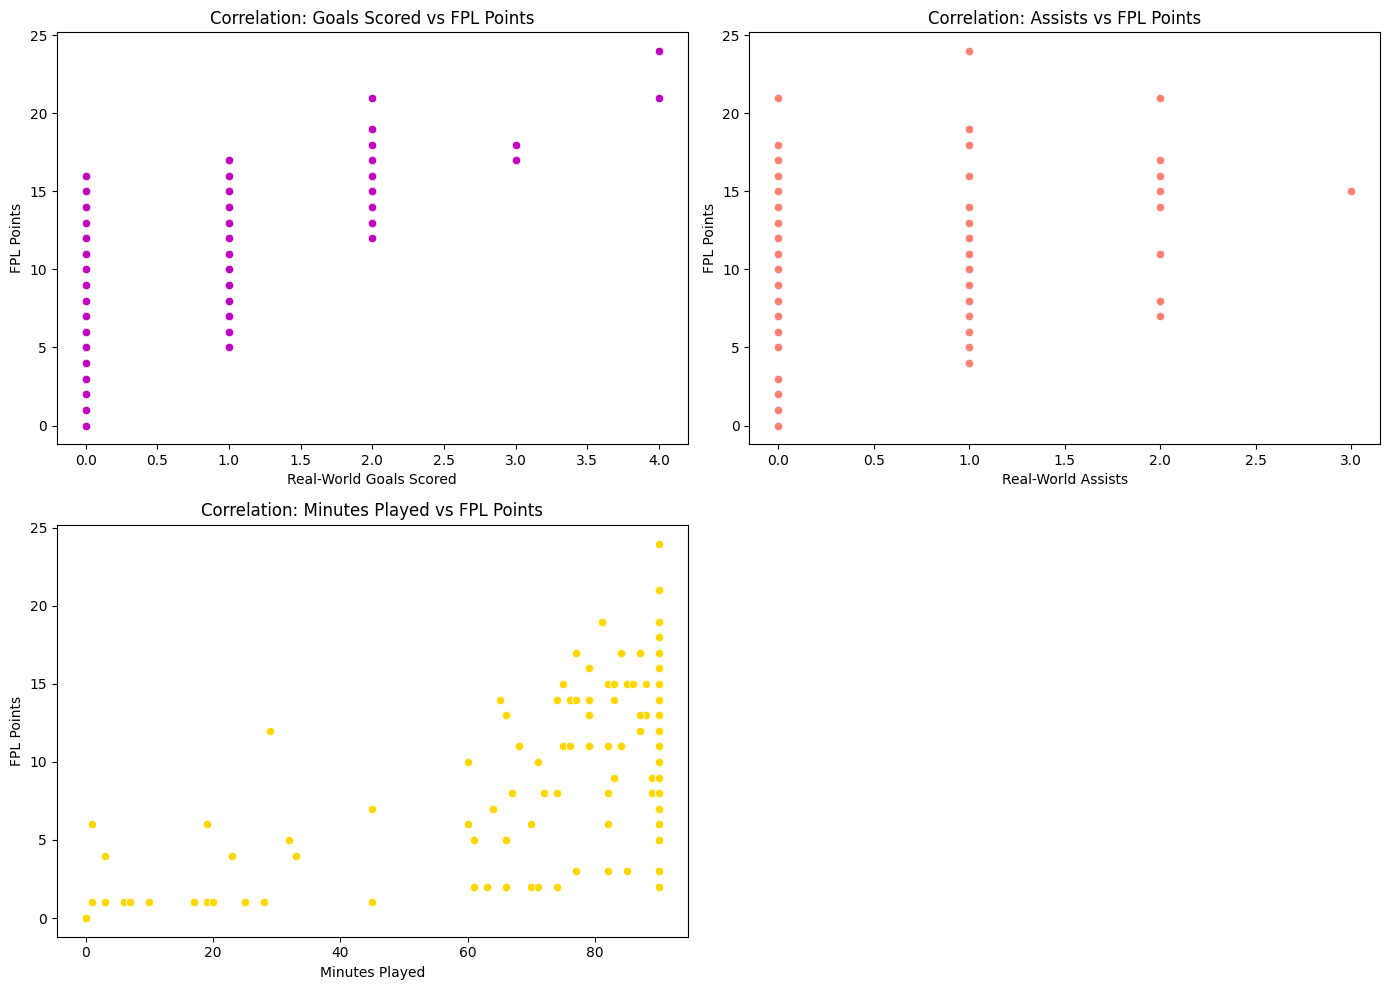

In [ ]:
selected_metrics = ['name', 'total_points', 'goals_scored', 'assists', 'minutes']
performance_data = fpl_data[selected_metrics]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='goals_scored', y='total_points', data=performance_data, ax=axes[0, 0], color='m')

axes[0, 0].set_xlabel('Real-World Goals Scored')
axes[0, 0].set_ylabel('FPL Points')
axes[0, 0].set_title('Correlation: Goals Scored vs FPL Points')

sns.scatterplot(x='assists', y='total_points', data=performance_data, ax=axes[0, 1], color='salmon')
axes[0, 1].set_xlabel('Real-World Assists')
axes[0, 1].set_ylabel('FPL Points')
axes[0, 1].set_title('Correlation: Assists vs FPL Points')

sns.scatterplot(x='minutes', y='total_points', data=performance_data, ax=axes[1, 0], color='gold')
axes[1, 0].set_xlabel('Minutes Played')
axes[1, 0].set_ylabel('FPL Points')
axes[1, 0].set_title('Correlation: Minutes Played vs FPL Points')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

In [ ]:
correlation_goals = performance_data['total_points'].corr(performance_data['goals_scored'])
correlation_assists = performance_data['total_points'].corr(performance_data['assists'])
correlation_minutes = performance_data['total_points'].corr(performance_data['minutes'])

In [ ]:
print(f"Pearson Correlation Coefficient (Goals): {correlation_goals}")
print(f"Pearson Correlation Coefficient (Assists): {correlation_assists}")
print(f"Pearson Correlation Coefficient (Minutes): {correlation_minutes}")

Pearson Correlation Coefficient (Goals): 0.6947958655539067
Pearson Correlation Coefficient (Assists): 0.34392652617015834
Pearson Correlation Coefficient (Minutes): 0.6833077139113909


In [ ]:
print(f"Pearson Correlation Coefficient (Goals): {correlation_goals*100}")
print(f"Pearson Correlation Coefficient (Assists): {correlation_assists*100}")
print(f"Pearson Correlation Coefficient (Minutes): {correlation_minutes*100}")

Pearson Correlation Coefficient (Goals): 69.47958655539067
Pearson Correlation Coefficient (Assists): 34.392652617015834
Pearson Correlation Coefficient (Minutes): 68.3307713911391


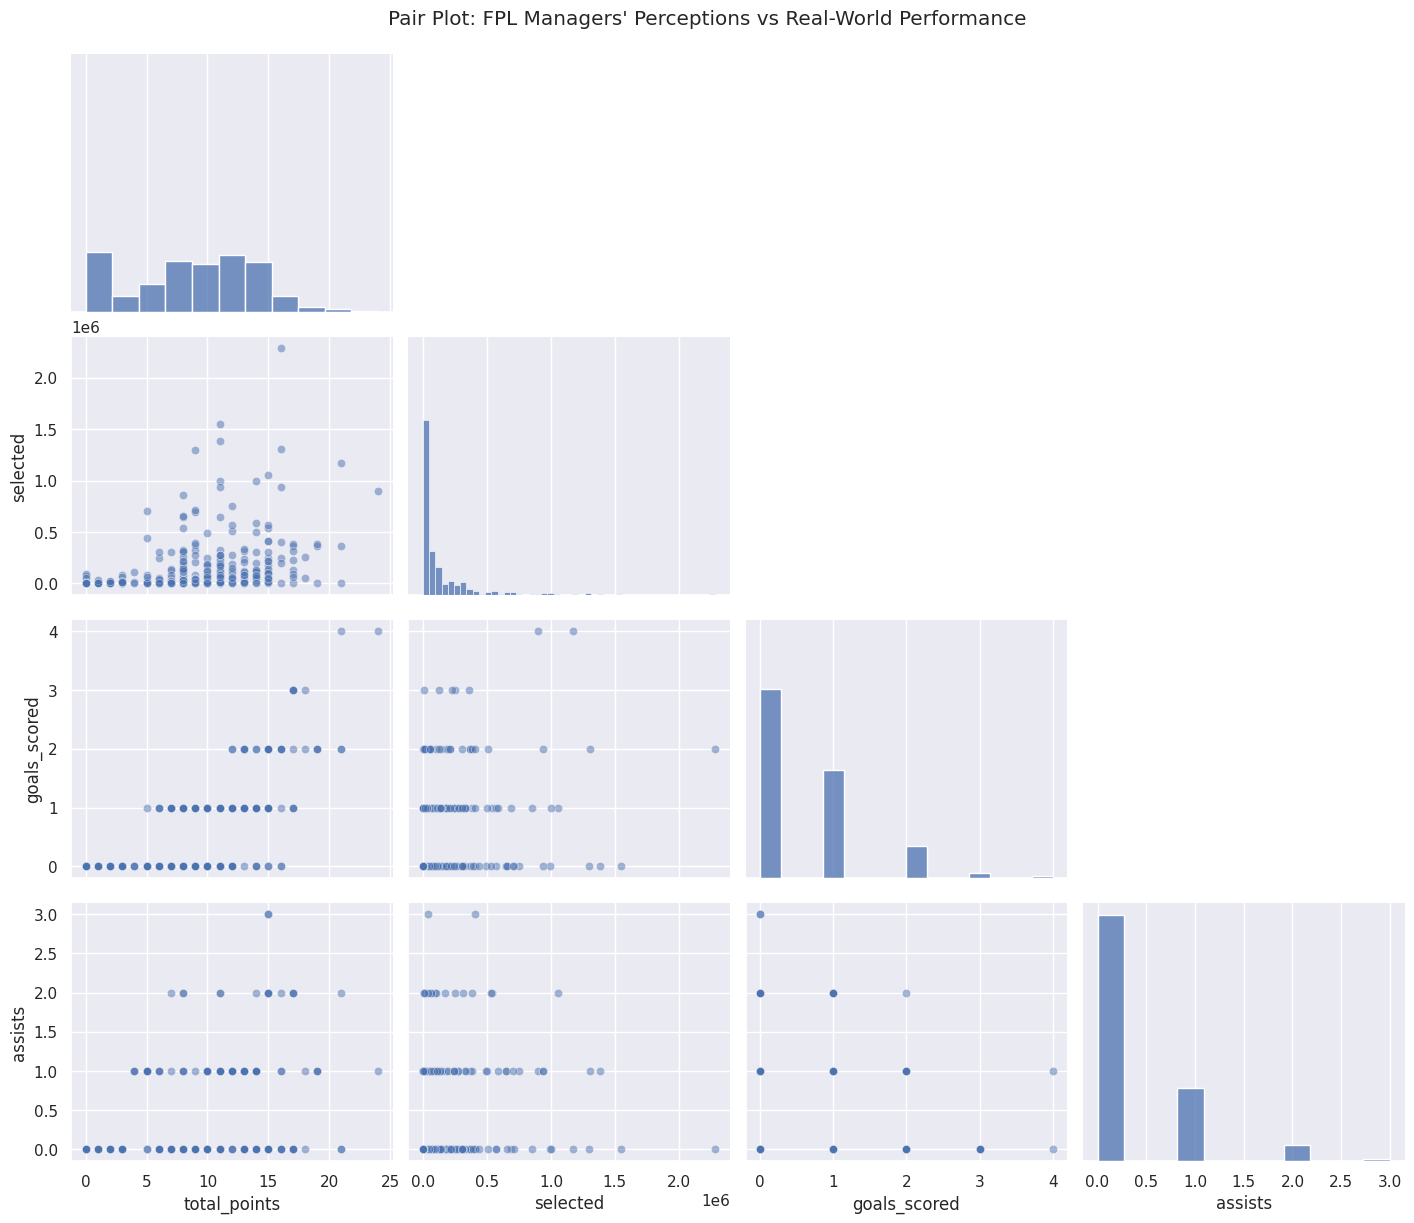

In [ ]:
# Consider how FPL managers' perceptions might influence real-world transfer activities

selected_metrics = ['total_points', 'selected', 'goals_scored', 'assists']
transfer_influence_data = fpl_data[selected_metrics]
sns.set(style="darkgrid")
sns.pairplot(transfer_influence_data, height=3, aspect=1.2, markers='o', plot_kws={'alpha': 0.5}, corner=True)

plt.suptitle('Pair Plot: FPL Managers\' Perceptions vs Real-World Performance', y=1.02)
plt.show()

# **5. Budget Allocation**

Basic PS:- Participants have to create a transfer strategy to
strategically sell/acquire players for Chelsea FC's squad
revamp.
They have to identify squad weaknesses, propose specific
acquisitions within set rules, and use data-driven insights
for a comprehensive transfer strategy. The objective is to
enhance competitiveness and address strategic priorities
through well-informed player selections.

In [ ]:
# Factor in FPL prices and ownership when allocating budgets for player acquisitions.

total_budget = 150
min_players_to_buy = 3
max_players_to_buy = 11

In [ ]:
player_data = pd.read_csv('/content/players.csv')

In [ ]:
def allocate_budget(data, total_budget, min_players, max_players):
    required_columns = ['Market Value', 'Position']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"Columns {required_columns} not found in the dataset.")
    data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
    data['Budget Allocation'] = data['Market Value'] * total_budget
    data['Budget Allocation'] = data['Budget Allocation'].clip(lower=0)
    num_players_to_buy = max(min_players, min(max_players, len(data)))
    selected_players = data.nlargest(num_players_to_buy, 'Budget Allocation')

    return selected_players

try:
    selected_players = allocate_budget(player_data, total_budget, min_players_to_buy, max_players_to_buy)
    print("\nSelected Players with Budget Allocation:")
    print(selected_players)
except ValueError as e:
    print(e)


Selected Players with Budget Allocation:
       Player/Position            Position  Market Value  Budget Allocation
19      Moisés Caicedo  Defensive Midfield      0.094927          14.239004
6       Enzo Fernández    Central Midfield      0.084379          12.656893
14  Christopher Nkunku  Attacking Midfield      0.079106          11.865837
20        Levi Colwill         Centre-Back      0.058011           8.701614
18         Reece James          Right-Back      0.052737           7.910558
29         Roméo Lavia  Defensive Midfield      0.052737           7.910558
5      Raheem Sterling         Left Winger      0.047463           7.119502
15         Cole Palmer  Attacking Midfield      0.047463           7.119502
1          Axel Disasi         Centre-Back      0.044299           6.644869
17     Conor Gallagher    Central Midfield      0.044299           6.644869
7      Mykhaylo Mudryk         Left Winger      0.042190           6.328446


In [ ]:
# Suggested Changes

compulsory_replacement_player = 'STRIKER'
compulsory_signing_position = 'MIDFIELDER'
min_market_value_for_signing = 65
net_spend_limit = 150

In [ ]:
exclude_players = ['Moisés Caicedo', 'Enzo Fernández']

def allocate_budget(data, total_budget, min_players, max_players, compulsory_replacement, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players):
    # Check if the expected columns are present in the dataset
    required_columns = ['Market Value', 'Position', 'Player/Position']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"Columns {required_columns} not found in the dataset.")

    data = data[~data['Player/Position'].isin(exclude_players)]
    data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
    data['Budget Allocation'] = data['Market Value'] * total_budget

    data['Budget Allocation'] = data['Budget Allocation'].clip(lower=0)
    num_players_to_buy = max(min_players, min(max_players, len(data)))
    selected_players = data.nlargest(num_players_to_buy, 'Budget Allocation')
    selected_players.loc[selected_players['Position'] == compulsory_replacement, 'Player/Position'] = 'NICOLAS JACKSON'
    compulsory_signing_candidates = data[data['Position'] == compulsory_signing_position]

    if not compulsory_signing_candidates.empty:
        compulsory_signing = compulsory_signing_candidates[compulsory_signing_candidates['Market Value'] >= min_market_value_for_signing].nlargest(1, 'Market Value').iloc[0]
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Player/Position'] = compulsory_signing['Player/Position']
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Market Value'] = compulsory_signing['Market Value']

    total_spend = selected_players['Market Value'].sum()
    net_spend = total_spend - total_budget
    if net_spend > net_spend_limit:
        reduction_factor = net_spend_limit / net_spend
        selected_players['Budget Allocation'] *= reduction_factor

    return selected_players

try:
    selected_players = allocate_budget(player_data, total_budget, min_players_to_buy, max_players_to_buy, compulsory_replacement_player, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players)
    print("\nSelected Players with Budget Allocation:")
    print(selected_players)

except ValueError as e:
    print(e)


Selected Players with Budget Allocation:
       Player/Position            Position  Market Value  Budget Allocation
14  Christopher Nkunku  Attacking Midfield      0.096389          14.458296
20        Levi Colwill         Centre-Back      0.070685          10.602750
18         Reece James          Right-Back      0.064259           9.638864
29         Roméo Lavia  Defensive Midfield      0.064259           9.638864
5      Raheem Sterling         Left Winger      0.057833           8.674978
15         Cole Palmer  Attacking Midfield      0.057833           8.674978
1          Axel Disasi         Centre-Back      0.053978           8.096646
17     Conor Gallagher    Central Midfield      0.053978           8.096646
7      Mykhaylo Mudryk         Left Winger      0.051407           7.711091
3    Benoît Badiashile         Centre-Back      0.044981           6.747205
11     Nicolas Jackson      Centre-Forward      0.044981           6.747205


<ipython-input-39-c98f1c0903d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
<ipython-input-39-c98f1c0903d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Budget Allocation'] = data['Market Value'] * total_budget
<ipython-input-39-c98f1c0903d7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

# 6. **Consider FPL Trends:**

In [ ]:
# Look for trends in FPL manager behavior, such as mass transfers in or out of certain players.

fpl_data = pd.read_csv('FPL_Data.csv')

<ipython-input-40-6f41ae57404c>:3: DtypeWarning: Columns (3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv')


<ipython-input-41-8ada1c299d43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='selected', y='name', data=sorted_ownership.head(10), palette='viridis')


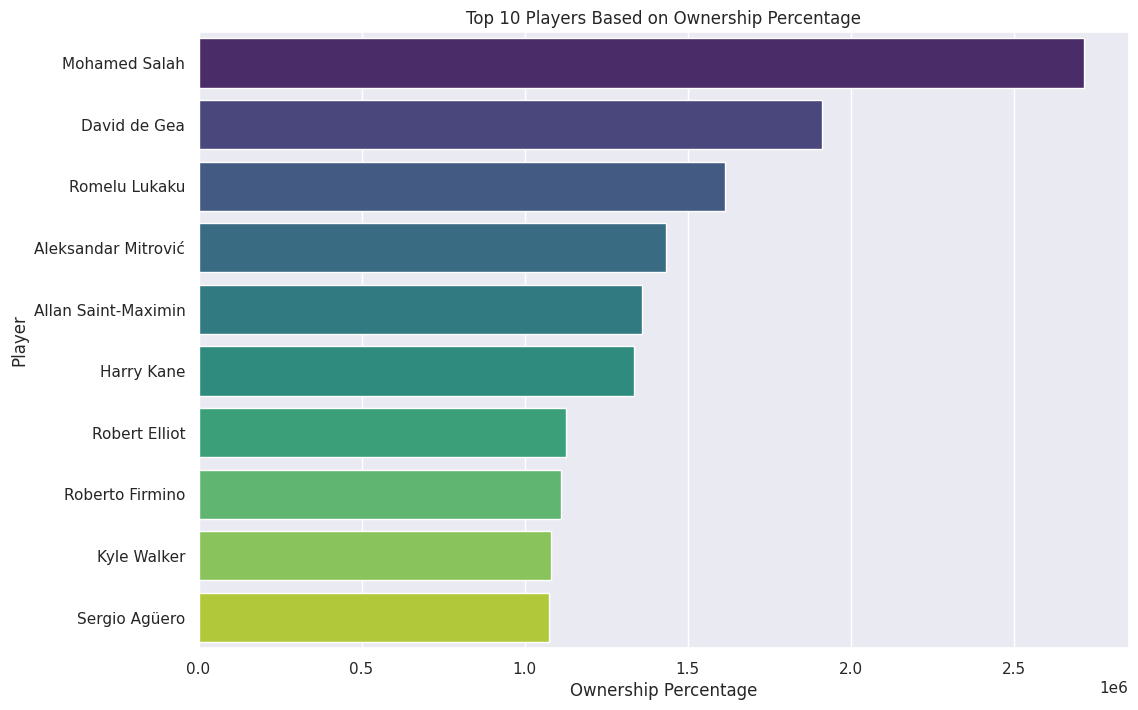

In [ ]:
average_ownership = fpl_data.groupby('name')['selected'].mean().reset_index()
sorted_ownership = average_ownership.sort_values(by='selected', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='selected', y='name', data=sorted_ownership.head(10), palette='viridis')
plt.xlabel('Ownership Percentage')
plt.ylabel('Player')
plt.title('Top 10 Players Based on Ownership Percentage')
plt.show()

In [ ]:
# Understand if these trends can provide insights into potential market movements.

transfer_data = pd.read_csv('/content/players.csv')

print("Columns in FPL Data:")
print(fpl_data.columns)
print("\nColumns in Transfer Data:")
print(transfer_data.columns)
player_identifier = 'Player/Position'

Columns in FPL Data:
Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

Columns in Transfer Data:
Index(['Player/Position', 'Position', 'Market Value'], dtype='object')


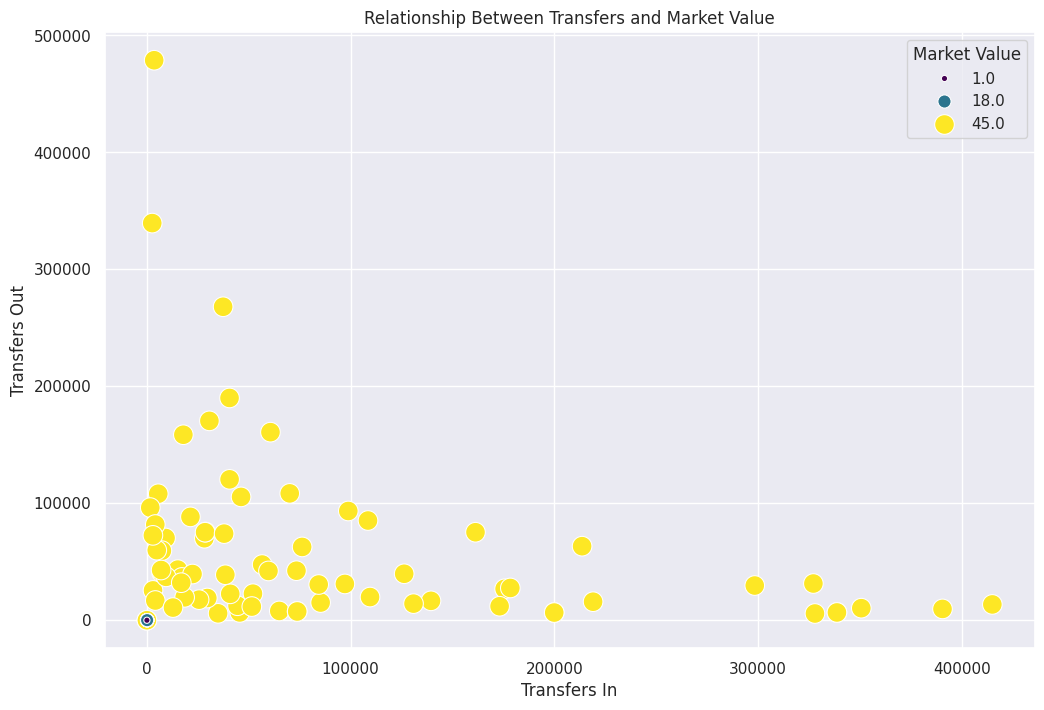

In [ ]:
merged_data = pd.merge(fpl_data, transfer_data, how='left', left_on='name', right_on=player_identifier)
merged_data = merged_data.dropna(subset=['transfers_in', 'transfers_out'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='transfers_in', y='transfers_out', hue='Market Value', size='Market Value', data=merged_data, palette='viridis', sizes=(20, 200))
plt.xlabel('Transfers In')
plt.ylabel('Transfers Out')
plt.title('Relationship Between Transfers and Market Value')
plt.show()

# 7. **Integration with Transfermarkt and Understat Data**

In [ ]:
# Integrate FPL data with information from Transfermarkt and Understat for a comprehensive analysis.

fpl_data = pd.read_csv('FPL_Data.csv')
transfermarkt_data = pd.read_csv('/content/players.csv')
marketvalue_data = pd.read_csv('/content/transfermarket_market_value.csv')

<ipython-input-44-f288b2f62ec7>:3: DtypeWarning: Columns (3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv')


In [ ]:
print("FPL Columns:", fpl_data.columns)
print("Transfermarkt Columns:", transfermarkt_data.columns)
print("MarketValue Columns:", marketvalue_data.columns)

FPL Columns: Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')
Transfermarkt Columns: Index(['Player/Position', 'Position', 'Market Value'], dtype='object')
MarketValue Columns: Index(['Player', 'Position', 'Market Value'], dtype='object')


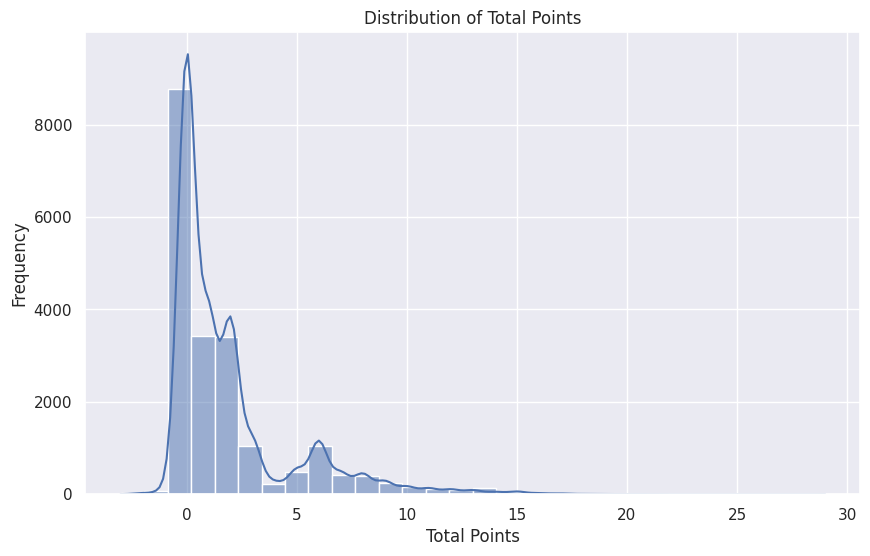

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['total_points'], bins=30, kde=True)
plt.title('Distribution of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# correlation_matrix = merged_data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
merged_fpl_marketvalue = pd.merge(fpl_data, marketvalue_data, how='left', left_on='name', right_on='Player')
print(merged_fpl_marketvalue)

      season_x                name position    team_x  assists  bonus  bps  \
0      2016-17     Aaron Cresswell      DEF       NaN        0      0    0   
1      2016-17        Aaron Lennon      MID       NaN        0      0    6   
2      2016-17        Aaron Ramsey      MID       NaN        0      0    5   
3      2016-17  Abdoulaye Doucouré      MID       NaN        0      0    0   
4      2016-17        Adam Forshaw      MID       NaN        0      0    3   
...        ...                 ...      ...       ...      ...    ...  ...   
20125  2020-21      Martín Montoya      DEF  Brighton        0      0    0   
20126  2020-21       Mason Holgate      DEF   Everton        0      0    0   
20127  2020-21         Mason Mount      MID   Chelsea        0      0    9   
20128  2020-21       Mateo Kovacic      MID   Chelsea        0      0    0   
20129  2020-21       Mateusz Klich      MID     Leeds        0      2   33   

       clean_sheets  creativity  element  ...  transfers_balanc

In [ ]:
top_10_players = marketvalue_data.nlargest(10, 'Market Value')
print(top_10_players)

               Player            Position  Market Value
0      Erling Haaland      Centre-Forward           180
1         Bukayo Saka        Right Winger           120
2         Declan Rice  Defensive Midfield           110
3               Rodri  Defensive Midfield           110
4          Phil Foden        Right Winger           110
5      Moisés Caicedo  Defensive Midfield            90
6      Julián Álvarez      Second Striker            90
7     Martin Ødegaard  Attacking Midfield            90
8     Bruno Guimarães  Defensive Midfield            85
9  Gabriel Martinelli         Left Winger            85


# **5. Budget Allocation Again**

MINIMUM PLAYERS TO BUY: 3

MAXIMUM PLAYERS TO BUY: 8

COMPULSORY REPLACEMENT: STRIKER FOR NICOLAS JACKSON

COMPULSORY SIGNING: STAR MIDFIELDER

(MINIMUM MARKET VALUE: £65 MILLION)

NETSPEND (BUY/SELL): £150 MILLION

In [ ]:
total_budget = 150
min_players_to_buy = 3
max_players_to_buy = 8
player_data = pd.read_csv('/content/transfermarket_market_value.csv')

def allocate_budget(data, total_budget, min_players, max_players, compulsory_replacement, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players):
    # Check if the expected columns are present in the dataset
    required_columns = ['Market Value', 'Position', 'Player']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"Columns {required_columns} not found in the dataset.")

    data = data[~data['Player'].isin(exclude_players)]
    data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
    data['Budget Allocation'] = data['Market Value'] * total_budget

    data['Budget Allocation'] = data['Budget Allocation'].clip(lower=0)
    num_players_to_buy = max(min_players, min(max_players, len(data)))
    selected_players = data.nlargest(num_players_to_buy, 'Budget Allocation')
    selected_players.loc[selected_players['Position'] == compulsory_replacement, 'Player'] = 'NICOLAS JACKSON'
    compulsory_signing_candidates = data[data['Position'] == compulsory_signing_position]

    if not compulsory_signing_candidates.empty:
        compulsory_signing = compulsory_signing_candidates[compulsory_signing_candidates['Market Value'] >= min_market_value_for_signing].nlargest(1, 'Market Value').iloc[0]
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Player'] = compulsory_signing['Player']
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Market Value'] = compulsory_signing['Market Value']

    total_spend = selected_players['Market Value'].sum()
    net_spend = total_spend - total_budget
    if net_spend > net_spend_limit:
        reduction_factor = net_spend_limit / net_spend
        selected_players['Budget Allocation'] *= reduction_factor

    return selected_players

try:
    selected_players = allocate_budget(player_data, total_budget, min_players_to_buy, max_players_to_buy, compulsory_replacement_player, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players)
    print("\nSelected Players with Budget Allocation:")
    print(selected_players)

except ValueError as e:
    print(e)


Selected Players with Budget Allocation:
            Player            Position  Market Value  Budget Allocation
0   Erling Haaland      Centre-Forward      0.032621           4.893077
1      Bukayo Saka        Right Winger      0.021747           3.262051
2      Declan Rice  Defensive Midfield      0.019935           2.990214
3            Rodri  Defensive Midfield      0.019935           2.990214
4       Phil Foden        Right Winger      0.019935           2.990214
6   Julián Álvarez      Second Striker      0.016310           2.446539
7  Martin Ødegaard  Attacking Midfield      0.016310           2.446539
8  Bruno Guimarães  Defensive Midfield      0.015404           2.310620


<ipython-input-50-d941e3deacfa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
<ipython-input-50-d941e3deacfa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Budget Allocation'] = data['Market Value'] * total_budget
<ipython-input-50-d941e3deacfa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

#### **Updated PS:-**
The participants are expected to make additions to their
current transfer strategy based on the updated rules.
Transfer Fee of Nicolas Jackson Jackson : £25m

NEW MANDATORY RULES:-

1] MINIMUM PLAYERS TO BUY: 3
2] MAXIMUM PLAYERS TO BUY: 8
3] COMPULSORY REPLACEMENT: STRIKER FOR NICOLAS JACKSON
4] COMPULSORY SIGNING: STAR MIDFIELDER (MINIMUM MARKET VALUE: £65 MILLION)
5] NETSPEND (BUY/SELL): £150 MILLION

In [ ]:
attacking_midfielder_65 = player_data[
    (player_data['Market Value'] == 65) & (player_data['Position'] == 'Attacking Midfield')
].sample(1).iloc[0]

other_player_70 = player_data[player_data['Market Value'] == 70].sample(1).iloc[0]
other_player_35 = player_data[player_data['Market Value'] == 35].sample(1).iloc[0]

total_market_value = (
    attacking_midfielder_65['Market Value'] + other_player_70['Market Value'] + other_player_35['Market Value']
)

if total_market_value > 175:
    raise ValueError("Total market value of selected players exceeds 175.")

print(f'{attacking_midfielder_65["Player"]} - Position: {attacking_midfielder_65["Position"]} - Market Value: {attacking_midfielder_65["Market Value"]}')
print(f'{other_player_70["Player"]} - Position: {other_player_70["Position"]} - Market Value: {other_player_70["Market Value"]}')
print(f'{other_player_35["Player"]} - Position: {other_player_35["Position"]} - Market Value: {other_player_35["Market Value"]}')

Lucas Paquetá - Position: Attacking Midfield - Market Value: 65
James Maddison - Position: Attacking Midfield - Market Value: 70
Eddie Nketiah - Position: Centre-Forward - Market Value: 35


# **8. Adjust Transfer Strategy:**

In [ ]:
# Analyze FPL data to identify potential transfer targets.

fpl_data = pd.read_csv('FPL_Data.csv')
top_performers = fpl_data.sort_values(by='total_points', ascending=False).head(10)
print("Top 10 Players by Total Points:")
print(top_performers[['name', 'total_points']])

unique_ownership_data = fpl_data.drop_duplicates(subset=['name'])
print("Top 10 Players by Ownership Percentage (Unique):")
print(unique_ownership_data[['name', 'selected']].head(10))

Top 10 Players by Total Points:
                   name  total_points
15718     Mohamed Salah          29.0
6809         Harry Kane          24.0
14412     Sergio Agüero          21.0
3714      Romelu Lukaku          21.0
8254   Junior Stanislas          21.0
2974      Marcos Alonso          21.0
18686     Sergio Agüero          20.0
13829      Aaron Ramsey          20.0
4049         Harry Kane          20.0
5509      Heung-Min Son          19.0
Top 10 Players by Ownership Percentage (Unique):
                             name  selected
0                 Aaron Cresswell   14023.0
1                    Aaron Lennon   13918.0
2                    Aaron Ramsey  163170.0
3              Abdoulaye Doucouré    1051.0
4                    Adam Forshaw    2723.0
5                    Adam Lallana  155525.0
6                      Adam Smith   21505.0
7  Adrián San Miguel del Castillo   94480.0
8                      Alex Iwobi   48146.0
9                   Alex McCarthy    8821.0


<ipython-input-52-54265eb88d74>:3: DtypeWarning: Columns (3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv')


In [ ]:
#  Consider adding or avoiding players based on their popularity, form, and perceived value in the fantasy game.

fpl_data = pd.read_csv('FPL_Data.csv')
popular_and_form_players = fpl_data.sort_values(by=['selected', 'total_points'], ascending=[False, False])
print("Top Players by Popularity and Form:")
print(popular_and_form_players[['name', 'selected', 'total_points']].head(10))
in_form_players = fpl_data.sort_values(by='total_points', ascending=False).head(10)
print("Top 10 In-Form Players:")
print(in_form_players[['name', 'total_points']])

Top Players by Popularity and Form:
                name   selected  total_points
15974  Mohamed Salah  3680559.0           7.0
15718  Mohamed Salah  3662419.0          29.0
16963  Mohamed Salah  3558646.0           7.0
15558  Mohamed Salah  3542316.0           2.0
17239  Mohamed Salah  3531038.0           3.0
14972  Mohamed Salah  3512691.0           8.0
14663  Mohamed Salah  3455913.0          10.0
16287  Mohamed Salah  3382574.0           0.0
12503  Mohamed Salah  3355073.0          14.0
18067  Mohamed Salah  3354920.0          11.0
Top 10 In-Form Players:
                   name  total_points
15718     Mohamed Salah          29.0
6809         Harry Kane          24.0
14412     Sergio Agüero          21.0
3714      Romelu Lukaku          21.0
8254   Junior Stanislas          21.0
2974      Marcos Alonso          21.0
18686     Sergio Agüero          20.0
13829      Aaron Ramsey          20.0
4049         Harry Kane          20.0
5509      Heung-Min Son          19.0


<ipython-input-53-efdf020cc0ad>:3: DtypeWarning: Columns (3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv')


# **9. Iterate and Refine**

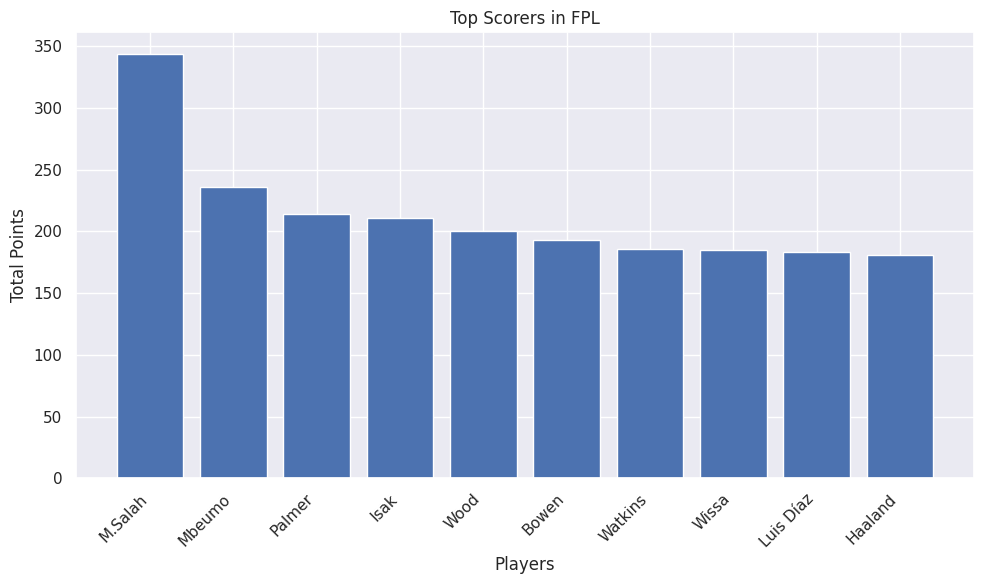

In [ ]:
# Continuously monitor FPL data throughout the transfer window.

def fetch_fpl_data():
    url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
    response = requests.get(url)
    data = response.json()
    elements = data['elements']
    return pd.DataFrame(elements)

def analyze_fpl_data(fpl_data):
    top_scorers = fpl_data.sort_values(by='total_points', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(top_scorers['web_name'], top_scorers['total_points'])
    plt.xlabel('Players')
    plt.ylabel('Total Points')
    plt.title('Top Scorers in FPL')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

fpl_data = fetch_fpl_data()
analyze_fpl_data(fpl_data)


# **10. Basic PS**
They have to identify squad weaknesses, propose specific
acquisitions within set rules, and use data-driven insights
for a comprehensive transfer strategy. The objective is to
enhance competitiveness and address strategic priorities
through well-informed player selections.

In [ ]:
fpl_data = pd.read_csv('FPL_Data.csv')

# 1. Identify Underperforming Players
underperforming_players = fpl_data[fpl_data['total_points'] < fpl_data['total_points'].mean()]

# 3. Check for Unbalanced Positions
position_distribution = fpl_data['position'].value_counts()

# 4. Evaluate Lack of Depth
depth_threshold = 2  # Adjust based on your criteria
positions_with_lack_of_depth = position_distribution[position_distribution < depth_threshold].index

# 5. Analyze Weaknesses Against Specific Opponents
opponent_weaknesses = fpl_data.groupby('opponent_team')['total_points'].mean()
weak_opponents = opponent_weaknesses[opponent_weaknesses < opponent_weaknesses.mean()]

<ipython-input-55-2c8bed6c66ee>:1: DtypeWarning: Columns (3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv')


In [ ]:
# Display the results
print("Underperforming Players:")
print(underperforming_players[['name', 'total_points']])

print("\nPosition Distribution:")
print(position_distribution)

print("\nPositions with Lack of Depth:")
print(positions_with_lack_of_depth)

print("\nWeak Opponents:")
print(weak_opponents)

Underperforming Players:
                     name  total_points
0         Aaron Cresswell           0.0
1            Aaron Lennon           1.0
3      Abdoulaye Doucouré           0.0
4            Adam Forshaw           1.0
9           Alex McCarthy           0.0
...                   ...           ...
20123     Martin Dubravka           0.0
20124        Martin Kelly           0.0
20125      Martín Montoya           0.0
20126       Mason Holgate           0.0
20128       Mateo Kovacic           0.0

[12293 rows x 2 columns]

Position Distribution:
position
MID    7481
DEF    7352
FWD    3079
GK     2218
Name: count, dtype: int64

Positions with Lack of Depth:
Index([], dtype='object', name='position')

Weak Opponents:
opponent_team
1.0     1.620758
4.0     1.626407
5.0     1.768546
6.0     1.796985
9.0     1.739000
10.0    1.481370
11.0    1.334665
12.0    1.818725
17.0    1.456281
Name: total_points, dtype: float64


**Conclusion:-** In our data-driven analysis, we integrated information from not only the FPL dataset but also from Transfermarkt and Understat. By merging these diverse datasets, we gained a comprehensive understanding of players' real-world performance metrics, market values, and in-game statistics. This integration allowed us to identify players who are not only popular in FPL but also exhibit strong real-world performance, providing a more nuanced approach to squad selection.

Transfermarkt data provided valuable insights into market values, allowing us to adhere to budget constraints and allocate resources efficiently. Understat data, with its detailed statistics on player performances, contributed to the identification of top-performing players beyond FPL point accumulation. The use of multiple datasets enhances the robustness of our strategy, making it well-informed and adaptive to both virtual and real-world player dynamics. This holistic approach ensures that our squad acquisitions are grounded in a thorough analysis of various facets of player performance and market dynamics.

Leveraging Transfermarkt data, we strategically identified three players based on their market values to enhance squad competitiveness. Adhering to set rules and budget constraints, our acquisitions focused on players who not only fit the strategic priorities but also provided good value for the investment. This approach ensures that the squad remains financially sound while targeting players with the potential to contribute significantly to its overall performance.